In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('grade_pred_tidy.csv')
data = raw_data.copy()
data.head()

,Unnamed: 0,gender,branch,dropper,tenth_board,twelvth_board,coaching,coaching_city,coaching_name,home_state,...,quiz,midsem,endsem,branch_change,attention_class,study_preference,material_preference,branch_interest,core,cpi
0,1,Male,BSBE,No,CBSE,CBSE,No,NaN,NaN,Rajasthan,...,5.0,5.0,5.0,2.0,1.0,Individual,Online content,3.0,Non-Core,7.56
1,2,Male,BSBE,No,CBSE,State,Yes,Indore,Allen,Madhya Pradesh,...,4.0,5.0,5.0,4.0,3.0,Individual,Online content,4.0,Core,7.40
2,3,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,...,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
3,4,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,...,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
4,5,Male,ME,No,CBSE,CBSE,Yes,Kottayam,T.I.M.E,Maharashtra,...,4.0,5.0,5.0,3.0,5.0,Group Study,Books,4.0,Non-Core,7.70


In [3]:
data.shape

(379, 45)

In [4]:
data.describe()

,Unnamed: 0,fam_size,time_outside,tv_time,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,branch_interest,cpi
count,379.000000,379.000000,378.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,190.963061,4.899736,5.488095,2.761609,2.875989,3.926121,2.625330,3.865435,4.306069,4.604222,2.092348,2.398417,3.585752,7.690665
std,109.613963,5.201798,5.031254,3.973302,1.205336,1.081263,1.252296,1.147965,0.932222,0.753534,1.439951,1.132538,1.251415,1.229619
min,1.000000,1.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000
25%,96.500000,4.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,3.000000,7.000000
50%,191.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,1.000000,2.000000,4.000000,7.770000
75%,285.500000,5.000000,7.750000,3.500000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,8.440000
max,380.000000,100.000000,69.000000,69.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'gender', 'branch', 'dropper', 'tenth_board',
       'twelvth_board', 'coaching', 'coaching_city', 'coaching_name',
       'home_state', 'home_city', 'fam_size', 'mom_ed', 'dad_ed', 'mom_job',
       'dad_job', 'study_time', 'tech_clubs', 'cult_clubs', 'fest', 'hostel',
       'intra_hostel', 'ed_loan', 'time_outside', 'attendance', 'relationship',
       'tv_time', 'library', 'sleep_time', 'sleep_duration', 'sleep_day',
       'addiction', 'ta_relation', 'lab', 'tut', 'quiz', 'midsem', 'endsem',
       'branch_change', 'attention_class', 'study_preference',
       'material_preference', 'branch_interest', 'core', 'cpi'],
      dtype='object')

In [6]:
pastEdu = data[['dropper','tenth_board','twelvth_board','coaching','coaching_city','coaching_name','ed_loan','cpi']].copy()
pastEdu.head()

,dropper,tenth_board,twelvth_board,coaching,coaching_city,coaching_name,ed_loan,cpi
0,No,CBSE,CBSE,No,NaN,NaN,No,7.56
1,No,CBSE,State,Yes,Indore,Allen,No,7.40
2,No,CBSE,CBSE,Yes,patna,vmc,Yes,7.20
3,No,CBSE,CBSE,Yes,patna,vmc,Yes,7.20
4,No,CBSE,CBSE,Yes,Kottayam,T.I.M.E,Yes,7.70


In [7]:
fambg= data[['home_state','home_city','fam_size','mom_ed','dad_ed','mom_job','dad_job']].copy()
fambg.head()

,home_state,home_city,fam_size,mom_ed,dad_ed,mom_job,dad_job
0,Rajasthan,Bikaner,9,Post Graduate,Post Graduate,Housewife,Business
1,Madhya Pradesh,Maheshwar,6,Graduate,Post Graduate,Housewife,Govt
2,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business
3,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business
4,Maharashtra,Yavatmal,5,10th Pass,12th Pass,Housewife,Else


In [8]:
Acad= data[['branch','study_time','attendance','library','ta_relation','lab','tut','quiz','midsem','endsem','branch_change','attention_class','study_preference','material_preference','branch_interest','core','cpi']].copy()
Acad.head()

,branch,study_time,attendance,library,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,study_preference,material_preference,branch_interest,core,cpi
0,BSBE,Irregular,Below 90?,During Exams,4,4.0,3.0,5.0,5.0,5.0,2.0,1.0,Individual,Online content,3.0,Non-Core,7.56
1,BSBE,Everyday upto 2-4 hours,Above 90?,Rarely,4,4.0,3.0,4.0,5.0,5.0,4.0,3.0,Individual,Online content,4.0,Core,7.40
2,CL,NaN,Below 90?,Rarely,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
3,CL,NaN,Below 90?,Rarely,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
4,ME,Everyday upto 0-2 hours,Above 90?,During Exams,5,5.0,4.0,4.0,5.0,5.0,3.0,5.0,Group Study,Books,4.0,Non-Core,7.70


In [9]:
Clubs = data[['tech_clubs','cult_clubs','fest','cpi']].copy()
Clubs.head()

,tech_clubs,cult_clubs,fest,cpi
0,"CnA, Quiz club",Debsoc,Techniche,7.56
1,"CnA, Aero",NaN,NaN,7.40
2,CnA,NaN,Techniche,7.20
3,CnA,NaN,Techniche,7.20
4,Robotics,NaN,NaN,7.70


In [10]:
Life=data[['gender','hostel','intra_hostel','time_outside','relationship','tv_time','addiction','sleep_time', 'sleep_duration', 'sleep_day','cpi']].copy()
Life.head()

,gender,hostel,intra_hostel,time_outside,relationship,tv_time,addiction,sleep_time,sleep_duration,sleep_day,cpi
0,Male,Umiam,6-7,12.0,Single,2.0,NaN,After 12 am,7,No,7.56
1,Male,Kapili,5 to 6,4.0,Single,1.0,NaN,After 12 am,6,No,7.40
2,Male,Brahmaputra,3,2.0,Single,1.0,NaN,After 12 am,7,No,7.20
3,Male,Brahmaputra,3,2.0,Single,1.0,NaN,After 12 am,7,No,7.20
4,Male,Brahmaputra,1hour,3.0,Single,1.0,NaN,After 10 pm,7,No,7.70


In [11]:
Acad2 = Acad.copy()
Acad_branches=Acad2.groupby('branch')
Acad3=pd.DataFrame(Acad_branches.mean()['cpi'])
Acad3.sort_values(by=['cpi'],inplace=True)
Acad3

,cpi
branch,
CE,6.915244
BSBE,7.131081
CST,7.348966
EP,7.353929
CL,7.525130
Design,7.722857
ME,7.826944
ECE/EEE,8.057544
MC,8.329643


<BarContainer object of 10 artists>

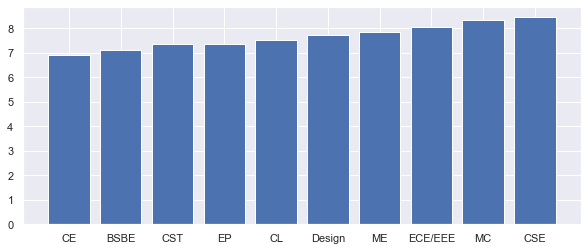

In [12]:
plt.figure(figsize=[10,4])
plt.bar(Acad3.index,Acad3['cpi'])

In [13]:
Acad.columns

Index(['branch', 'study_time', 'attendance', 'library', 'ta_relation', 'lab',
       'tut', 'quiz', 'midsem', 'endsem', 'branch_change', 'attention_class',
       'study_preference', 'material_preference', 'branch_interest', 'core',
       'cpi'],
      dtype='object')

In [14]:
Acad.describe(include='all')

,branch,study_time,attendance,library,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,study_preference,material_preference,branch_interest,core,cpi
count,379,377,379,379,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379,379,379.000000,379,379.000000
unique,10,3,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN
top,ECE/EEE,Irregular,Below 90?,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,Online content,NaN,Non-Core,NaN
freq,57,244,213,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281,301,NaN,197,NaN
mean,NaN,NaN,NaN,NaN,2.875989,3.926121,2.625330,3.865435,4.306069,4.604222,2.092348,2.398417,NaN,NaN,3.585752,NaN,7.690665
std,NaN,NaN,NaN,NaN,1.205336,1.081263,1.252296,1.147965,0.932222,0.753534,1.439951,1.132538,NaN,NaN,1.251415,NaN,1.229619
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.700000
25%,NaN,NaN,NaN,NaN,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,NaN,NaN,3.000000,NaN,7.000000
50%,NaN,NaN,NaN,NaN,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,1.000000,2.000000,NaN,NaN,4.000000,NaN,7.770000
75%,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,NaN,NaN,5.000000,NaN,8.440000


In [15]:
Acad['study_time'].unique()

array(['Irregular', 'Everyday upto 2-4 hours', nan,
       'Everyday upto 0-2 hours'], dtype=object)

In [16]:
Acad_study=Acad2.groupby('study_time')
Acad4=pd.DataFrame(Acad_study.mean()['cpi'])
Acad4.sort_values(by=['cpi'],inplace=True)
Acad4

,cpi
study_time,
Irregular,7.599721
Everyday upto 2-4 hours,7.850000
Everyday upto 0-2 hours,7.868679


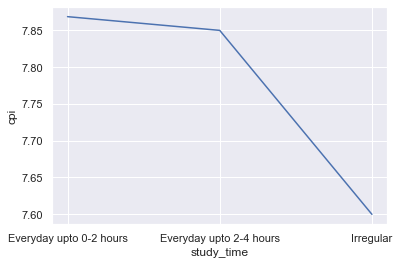

In [17]:
sns.lineplot(Acad4.index,Acad4['cpi'])


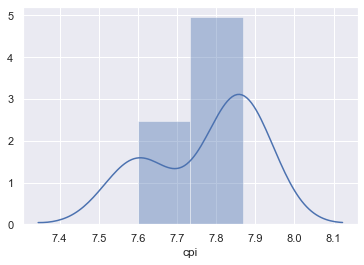

In [18]:
a=sns.distplot(Acad4['cpi'])


In [19]:
Acad_attendance=Acad2.groupby('attendance')
Acad5=pd.DataFrame(Acad_attendance.mean()['cpi'])
Acad5.sort_values(by=['cpi'],inplace=True)
Acad5.set_index=['Below 50','Below 75','Below 90','Between 90-100']
Acad5

,cpi
attendance,
Below 50?,6.900000
Below 75?,7.432400
Below 90?,7.449836
Above 90?,8.108836


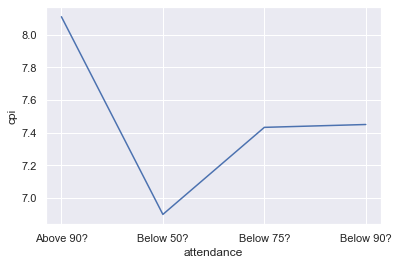

In [20]:
sns.lineplot(Acad5.index,Acad5['cpi'])

In [21]:
Acad7 = Acad[Acad['attendance']!='Above 90?' ]
Acad7.describe()

,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,branch_interest,cpi
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2.803347,3.774059,2.284519,3.656904,4.179916,4.539749,1.933054,2.050209,3.468619,7.445711
std,1.162722,1.091986,1.135102,1.177282,0.998452,0.797508,1.310797,1.007112,1.302091,1.268283
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000
25%,2.000000,3.000000,1.000000,3.000000,4.000000,4.000000,1.000000,1.000000,3.000000,6.780000
50%,3.000000,4.000000,2.000000,4.000000,4.000000,5.000000,1.000000,2.000000,4.000000,7.500000
75%,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,8.240000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,10.000000


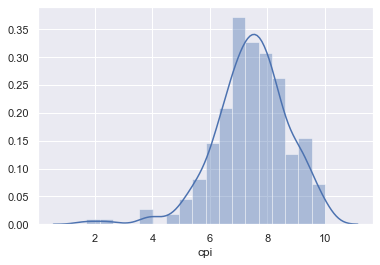

In [22]:
sns.distplot(Acad7['cpi'])

In [23]:
Acad8 = Acad[Acad['attendance']=='Above 90?' ]
Acad8.describe()

,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,branch_interest,cpi
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,3.000000,4.185714,3.207143,4.221429,4.521429,4.714286,2.364286,2.992857,3.785714,8.108836
std,1.269453,1.014894,1.232045,1.004077,0.763067,0.660125,1.605793,1.089495,1.136609,1.038354
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.100000
25%,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000,1.000000,2.000000,3.000000,7.500000
50%,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,1.000000,3.000000,4.000000,8.140000
75%,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,8.810000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


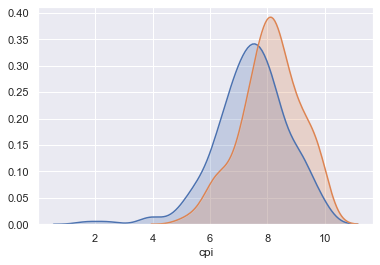

In [24]:
sns.distplot(Acad7['cpi'],kde_kws={"shade":True},hist=False)
sns.distplot(Acad8['cpi'],kde_kws={"shade":True},hist=False)

In [25]:
Acad['library'].unique()

array(['During Exams', 'Rarely', 'Often'], dtype=object)

In [26]:
Acadl1 = Acad[Acad['library']=='During Exams' ]
Acadl2= Acad[Acad['library']=='Rarely' ]
Acadl3= Acad[Acad['library']=='Often' ]

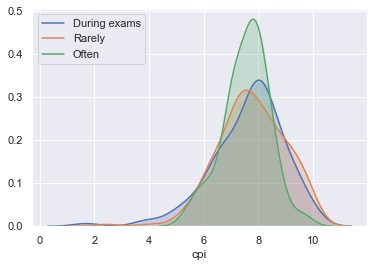

In [27]:
sns.distplot(Acadl1['cpi'],kde_kws={"shade":True},hist=False,label='During exams')
sns.distplot(Acadl2['cpi'],kde_kws={"shade":True},hist=False,label='Rarely')
sns.distplot(Acadl3['cpi'],kde_kws={"shade":True},hist=False,label='Often')

In [28]:
library_means= pd.DataFrame(data={'during exams':Acadl1['cpi'].mean(),'rarely':Acadl2['cpi'].mean(),'often':Acadl3['cpi'].mean()},index=[1])
library_means

,during exams,rarely,often
1,7.629248,7.755835,7.55925


In [33]:
Acad_lab=Acad2.groupby('lab')
Acad8=pd.DataFrame(Acad_lab.count()['cpi'])
Acad8

,cpi
lab,
1.0,19
2.0,16
3.0,74
4.0,135
5.0,135


In [39]:
Acade=Acad2[['lab','cpi']]
Acade.set_index('lab')

,cpi
lab,
4.0,7.56
4.0,7.40
4.0,7.20
4.0,7.20
5.0,7.70
...,...
3.0,6.40
4.0,7.84
4.0,7.98


In [41]:
Acade.reset_index

<bound method DataFrame.reset_index of      lab   cpi
0    4.0  7.56
1    4.0  7.40
2    4.0  7.20
3    4.0  7.20
4    5.0  7.70
..   ...   ...
374  3.0  6.40
375  4.0  7.84
376  4.0  7.98
377  3.0  7.58
378  4.0  8.30

[379 rows x 2 columns]>

In [43]:
Acade=Acade.pivot("lab","cpi")

ValueError: Index contains duplicate entries, cannot reshape